In [194]:
#import modules and packages
from imutils.perspective import four_point_transform
from imutils import contours
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

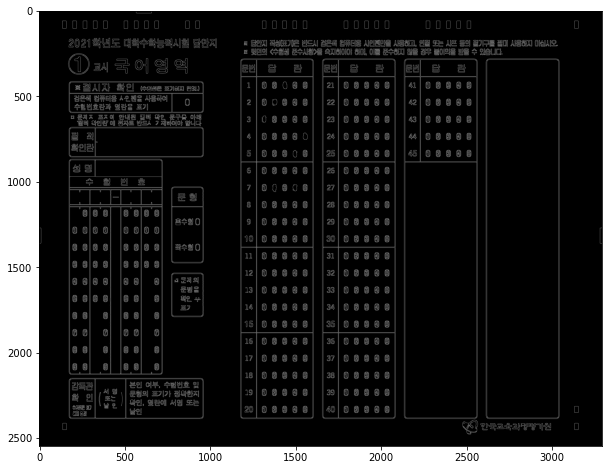

In [195]:
#load the image and preprocess
plt.rcParams["figure.figsize"] = (12,7)
img=cv2.imread('a.png',cv2.IMREAD_COLOR)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
canny=cv2.Canny(blurred, 50, 200)
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))

In [196]:
#finding contours
cnts=cv2.findContours(canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
cnts=sorted(cnts, key=cv2.contourArea, reverse=True)

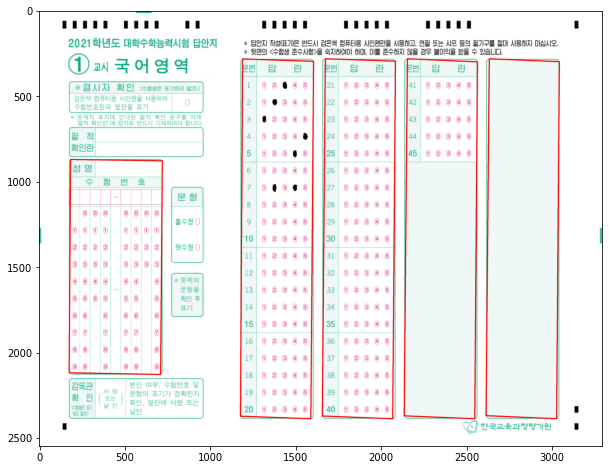

In [197]:
#reducing vertices by approxPolyDP, finding answer area
fa=np.empty((0,1,2), int)
for c in cnts: 
    peri=cv2.arcLength(c, True) 
    approx=cv2.approxPolyDP(c, 0.005*peri, True) 
    if len(approx)==4:
        cv2.drawContours(img, [approx], 0, (0, 0, 255), 5)
        fa=np.append(fa, approx, axis=0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

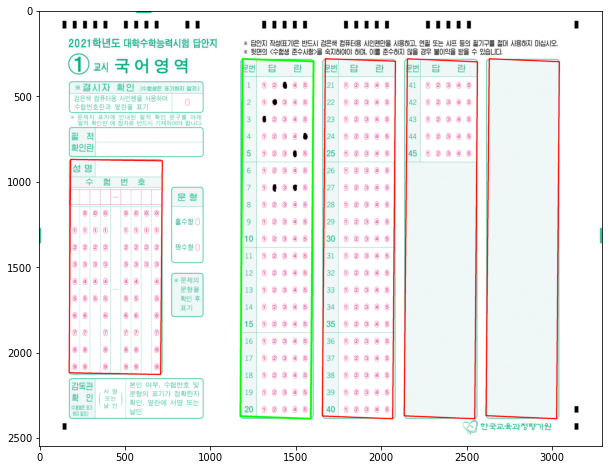

In [198]:
cv2.drawContours(img, [fa[8:12]], 0, (0, 255, 0), 10)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

1178 280 429 2106


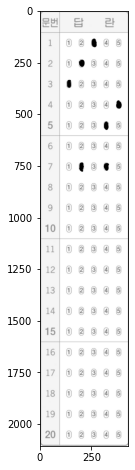

In [199]:
#slicing
x, y, w, h = cv2.boundingRect(fa[8:12])
print(x, y, w, h)
roi=gray[y:y+h, x:x+w]
cv2.imwrite('roi.png',roi)
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))